In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def xls_b26_to_b10(x):
    # TODO: check for anything other than [a-z]    
    zero_offset = 96        # make offset from ord('a') > 0
    col_num = -1            # automatically covert for 0 to 1 based
    b26 = 26                # 'a-z' is base 26
    
    # make lower and reverse order
    x = x.lower()[::-1]
    
    # get each value at each power of base 26
    b26_vals = [b26**(i)*(ord(j) - zero_offset) for i, j in enumerate(x)]
    
    # add base 26 power values to column number and return
    col_num += np.array(b26_vals).sum()
    
    return col_num

In [35]:
# init data to be processed
f_name = "NF-NF 1-27-09.xls"
data_sheet = 'Master'

# extract data to dataframe
df_master = pd.read_excel(f_name, data_sheet)

# convert dtype from object to datetime
df_master['DateTime'] = df_master['DateTime'].apply(pd.to_datetime)

In [11]:
lbls = list(df_master)

for x in ['i', 'ae', 'af']:
    print lbls[xls_b26_to_b10(x)]

MF_FILTRATE_FLOW
MF_ROWA_TMP
MF_ROWB_TMP


In [143]:
w

array([ 0.        ,  0.00050761,  0.00101523,  0.00152284,  0.00203046,
        0.00253807,  0.00304569,  0.0035533 ,  0.00406091,  0.00456853,
        0.00507614,  0.00558376,  0.00609137,  0.00659898,  0.0071066 ,
        0.00761421,  0.00812183,  0.00862944,  0.00913706,  0.00964467,
        0.01015228,  0.0106599 ,  0.01116751,  0.01167513,  0.01218274,
        0.01269036,  0.01319797,  0.01370558,  0.0142132 ,  0.01472081,
        0.01522843,  0.01573604,  0.01624365,  0.01675127,  0.01725888,
        0.0177665 ,  0.01827411,  0.01878173,  0.01928934,  0.01979695,
        0.02030457,  0.02081218,  0.0213198 ,  0.02182741,  0.02233503,
        0.02284264,  0.02335025,  0.02385787,  0.02436548,  0.0248731 ,
        0.02538071,  0.02588832,  0.02639594,  0.02690355,  0.02741117,
        0.02791878,  0.0284264 ,  0.02893401,  0.02944162,  0.02994924,
        0.03045685,  0.03096447,  0.03147208,  0.0319797 ,  0.03248731,
        0.03299492,  0.03350254,  0.03401015,  0.03451777,  0.03

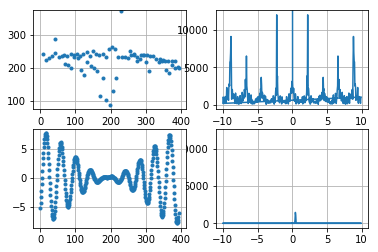

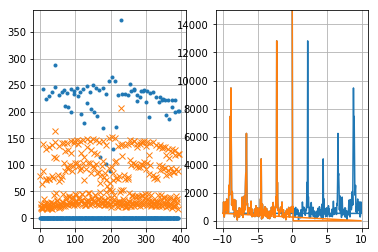

In [145]:
# do frequency analysis

# set time boundaries
t_start = pd.datetime(2009, 1, 29, 13, 15)
t_end = pd.datetime(2009, 1, 30, 22, 5)

# get flow data
time = df_master[(df_master['DateTime'] > t_start) & (df_master['DateTime'] < t_end)]['DateTime'].values
flow = df_master[(df_master['DateTime'] > t_start) & (df_master['DateTime'] < t_end)][lbls[xls_b26_to_b10('i')]].values

plt.close('all')

# convert time to frequency
flow_ff = np.fft.fft(flow)
w = np.fft.fftfreq(flow.size, d=0.05)

# apply high pass filter
flow_ff_cut = flow_ff.copy()
l_cut = 0.39 # 0.07, 0.15, 0.27
r_cut = 0.6 # 0.15, 0.27, 0.39
flow_ff_cut[(w < l_cut) | (w > r_cut)] = 0

# convert frequency to time
flow_cut = np.fft.ifft(flow_ff_cut)

# get frequency of low flow
flow_low = flow.copy()
flow_low[flow_low > 375] = 0
flow_low_ff = np.fft.fft(flow_low)
flow_low_ff_cut = flow_low_ff.copy()
l_cut = 0.07 # 0.07, 0.15, 0.27, 0.39
r_cut = 0.6 # 0.15, 0.27, 0.39, 0.6
#flow_low_ff_cut[w < 0.08] = 0
flow_low_ff_cut[w > 0.15] = 0
flow_low_cut = np.fft.ifft(flow_low_ff_cut)

# plot flow data wrt time
plt.figure()
plt.subplot(221)
plt.plot(flow, '.')
plt.ylim(75, 375)
plt.grid()

# plot flow data wrt frequency
plt.subplot(222)
plt.plot(w, np.absolute(flow_ff))
#plt.xlim(0.01,0.5)
plt.ylim(-601.40374047869045, 12629.478550052499)
plt.grid()

# plot frequency filtered data
plt.subplot(224)
plt.plot(w, np.absolute(flow_ff_cut))
#plt.xlim(0.01,0.5)
plt.ylim(-601.40374047869045, 12629.478550052499)
plt.grid()

# plot filtered data wrt time
plt.subplot(223)
plt.plot(flow_cut, '.')
plt.grid()
plt.show()

# plot low flow
plt.figure
plt.subplot(121)
plt.plot(flow_low, '.')
plt.plot(np.absolute(flow_low_cut), 'x')
plt.grid()
plt.subplot(122)
plt.plot(w, np.absolute(flow_low_ff))
plt.plot(w, np.absolute(flow_low_ff_cut))
#plt.xlim(0.01,0.5)
plt.ylim(-500, 15000)
plt.grid()

plt.show()